<a href="https://colab.research.google.com/github/raaraya1/Personal-Proyects/blob/main/Cursos/Time_Series/Econometry_Time_Series_Uandes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time series and forecasting


**Time Series and Forecasting**

- Forecasting is requerid in many situations for example:
 - future electricity demand when deciding whether to built a wen power generator plant 
 - call volumes when scheduling staff in a call center 
 - stock requeriments when stocking an inventory 

- The predectibility of an event (or quantity) highly depends on how well we understand the factors that contribute ot it, how much data is available and whether forecast can affect the thing itself to be predicted.

Example: Electricity demand vs currency exchange rates.

- In he course we will work with quantitative forecasting that us used when numerical info about the past is available and when we can assume that some aspects of the past patterns will continue into the future.

- For quantitative forecasting we need timeseries data: data observed sequentially over the time. Moreover, we will only work with time series that are observed at regular interval of time.

- In order to forecast a variable it is recomended that we always (I) **Perform an exploratory analysis**, (II) **choose and fit potential models** and (III) **Evaluate their performance**.

**Time series notation**

- Let $y$ be our variable of interest. The observation at date $t$ is denoted $y_{t}$, and the total number of observations is denoted $T$. TThe interval between observations is constant and in time units (day, week, etc) and we denote time series as $y_{t}, t \in (1,..., T)$ where $t=1$ correspond to the first and $t=T$ to the las date in the dataset.

- Define the first lag of $y$ as the value of $y$ in the previuos period. $y_{t-1}$ it can also be written by using the **lag operator** $Ly_{t} = y_{t-1}$. In general, the $Jth$ lag of $y$ is its value $j$ periods $(y_{t-j} = L^{j}y_{t})$.

**Note**: The lag operator can be treated using ordinary algebrar rules.

- Define the **first difference of $y$** as the change in $y$ between periods $t-1$ and $t$: $\Delta y_{t} = y_{t} - y_{t-1} = (1 - L)y_{t}$, sometimes, we will use the **second difference of $y$**: $\Delta^{2}y_{t} = \Delta y_{t} - \Delta y_{t-1} = (1 - L)^{2} y_{t}$

**Note:** it is important to understand that $(1 - L^{2})y_{t} \neq (1 - L)^{2}y_{t}$.


- Some economic time series are often analyzed after taking their logarithms $ln(y_{t})$ because:
 - (I) **if $y_{t}$ has exponential growth, then $ln(y_{t})$ grows linealy**
 - (II) **if $y_{t}$ has variance proportional to its level, then $in(y_{t})$ has constant variance**
 - (III) **$\Delta in(y_{t})$** measure the percentage change of $y_{t}$.

- **Autocorrelation**

$$
\rho_{j} = corr(y_{t}, y_{t-1}) = \frac{cov(y_{t}, y_{t-j})}{\sigma_{y_{t}}\sigma_{y_{t-j}}}
$$

$$
cov(y_{t}, y_{t-1}) = \frac{1}{T} \sum_{t=j+1}^{T} (y_{t} - \bar{y})(y_{t-j} - \bar{y})
$$

$$
var(y_{t}) = \sigma_{y_{t}} = \frac{1}{T} \sum (y_{t} - \bar{y})^{2}
$$

We assume $E(y_{t}) = E(y_{t-j}) = \bar{y}$ (another implication of **stationarity**)

## ACF and correlogram

- The autocorrelation function (ACF) is a list of the first $j$ estimated autocorrelations: $\hat{\rho_{1}}, \hat{\rho_{2}}, ..., \hat{\rho_{j}}$

- The correlogram is the plot of the ACF:

**Stationarity**

- Forecast use data on the past to forecast the future, therefore, it is reasonably to argue that in order to built forecast we need the future to be "similar" to the past.

- A time series $y$ is stationary if, for all $j$, the distribution of $(y_{t}, ..., y_{t-j})$ does not depend on $t$. In other words, $y$ is **stationarity** if its property does not depend on the time at which the series is observed.

**Note:** $y$ is **weakly stationary** if $E(y_{t}) = \mu, \forall t$ and $E((y_{t} - \mu)(y_{t-j} - \mu)) = \delta, \forall t$.

- Time series with trends, with seasonality and/or with heterosedosticity are not stationarity because the mean and/or variance changes overtime.

- Logaritms can help to stabilize the time series variance, first difference and seasonal-difference can hel to stabilize the time series mean by removing its trends and seasonality.

**Note:** if the data have a strong seanonal pattern, it is recomended to do the seasonal differencing first.


**OLS assumptions in time series models**

- Consider  the following regression model:

$$
y_{t} = \beta_{0} + \beta_{1}x_{1t} + ... + \beta_{k}x_{kt} + U_{t} \quad \forall t \in (1, ..., T)
$$

- Where $y_{t}$ is the outcome of interest; $x_{jt}$ for $j=1, ..., k$ are the predictors and $U_{t}$ is the "unpredictable component of $y$". For anbiased and efficient forecast of $y$ we need to assume:

 - 1) Not perfect multicollinearity
 - 2) Model specifications: the Cef is lineal and given by $E(y / X) = X\beta$
 - 3) Conditional mean independence: $E(u_{i}/x_{i}) = 0, \forall i$
 - 4) The IID asumption is now replaced by **the random variables (y_{t}, x_{1t}, ..., x_{kt} are weakly-stationary)**. This assumption is very important for external validits, because it implies that $E(y_{oos}/x) = E(y_{t}/x)$
   - Unit root test are an objective way to test for stationarity. The 2 most common are:
     - ADF test: $H_{0}$ (null hipothesis) is that $y_{t}$ **is non-stationarity**.
     - KPSS test: $H_{0}$ (null hipothesis) is that $y_{t}$ **is stationarity**. 
  

## Arima models

**Introduction**

- if you want to forecast the future, a good place to stare is the immediate past.
- ARIMA models and Exponential Smoothing are the two most widdly used approachs for time series forecasting.
- Esponential Smoothing methods are based on capturing the trend and seasonality in the data. With these methods, forecasting are weighted averages of the past observations.

**Autoregressive models**

- An autoregressive model states that the conditional mean of stationaty time series $y_{t}$ can be expressed as a linear function of its own lagged values.

- A first-order autoregression of $AR(1)$, states that $E(y_{t}/y_{t-1}, y_{t-2}, ...) = C + \phi_{1}y_{t-1}$. In this case, the model can be written as: (where $\mu = E(y_{t}) = E(y_{t-1})$)

$$
y_{t} = C + \phi_{1}y_{t-1} + \epsilon \quad or \quad (y_{t} - \mu) = \phi_{1}(y_{t-1} - \mu) + \epsilon_{t}
$$

- If we want to incorporate information of a more distant past, then we can use a $p$-order autoregression or $AR(p)$. The model in this case is:

$$
y_{t} = C + \phi_{1}y_{t-1} + \phi_{2}y_{t-2} + ... + \phi_{p}y_{t-p} + \epsilon_{t}
$$

- Which can also be written as:

$$
(1 - \phi_{1}L - \phi_{2}L^{2} - ... - \phi_{p}L^{p})(y_{t} - \mu) = \epsilon_{t}
$$

- In $AR$ models the conditional mean independence assumption translate to a **white noise error assumption**

$$
E(\epsilon_{t} / y_{t-1}, y_{t-2}, ..., y_{t-p}) = 0
$$

**Note:** Autoregressive modesl ($AR$) ignore seasonality.




**Moving Average Models**

- Rather than using past values of the outcome variable in a regression model, a moving average model uses past errors (must be white noise): 

$$
y_{t} - \mu = \epsilon_{t} + \theta_{1}\epsilon_{t-1} + \theta_{2}\epsilon_{t-2} + ... + \theta_{q}\epsilon_{t-q}
$$

- We refer to this as a $MA(q)$ model, which can also be written as: 

$$
y_{t} - \mu = (1 + \theta_{1}L + \theta_{2}L^{2} + ... + \theta_{q}L^{q})\epsilon_{t}
$$

- This looks like a regression model, but it is not a regression in the usual sense, since we do not observe the values of $U_{t}$.

 - **Note**: ($y_{t} = C + \hat{\phi_{1}}y_{t-1} + \epsilon_{t} = \hat{y_{t}} + \epsilon_{t}$) -> ($\hat{\epsilon_{t}} = y_{t} - \hat{y_{t}}$)

- Estimation of $MA(q)$ models (and also $AR(p)$ models) is usally conductedd by **maximum likelihood**, since it outperforms OLS.

**ARMA models**

- If we combine an autoregression $AR(p)$ with a moving average model $MA(q)$ we obtain, for a stationarity time series $y_{t}$, an $ARMA(p, q)$ model.

$$
y_{t} = C + \phi_{1}y_{t-1} + \phi_{2}y_{t-2} + ... + \phi_{p}y_{t-p} + \epsilon_{t} + \theta_{1}\epsilon_{t-1} + \theta_{2}\epsilon_{t-2} + ... + \theta_{q}\epsilon_{t-q}
$$

- So that predictors now include both lagged values of $y_{t}$ and lagged errors. Again, this model can be written as:

$$
(1 - \phi_{1}L - \phi_{2}L^{2} - ... - \phi_{p}L^{p})(y_{t} - \mu) = (1 + \theta_{1}L + \theta_{2}L^{2} + ... + \theta_{q}L^{q})\epsilon_{t}
$$

- Moreover, we will abbreviate notation by writing:

$$
\phi_{p}(L)(y_{t} - \mu) = \theta_{q}(L)\epsilon_{t}
$$

- If the time series $y_{t}$ is not stationarity, and $d$ diffenences are needed do make it stationarity, then we have and $ARIMA (p, d, q)$ model (where $\Delta^{d} = (1 - L)^{d}y_{t}$):

$$
\phi_{p}(L)\Delta^{d}y_{t} = \theta_{q}(L)\epsilon_{t}
$$

- $\mu$ is not estimated when $d>0$. If a constant $C$ is added to the model when $d=1$, then we have an $ARIMA$ with **drift** (i.e. Linear Trend)

$$
\phi_{p}(L)\Delta(y_{t} - C) = \theta_{q}(L)\epsilon_{t}
$$


## Model selection: ACF and PACF 

- How can we optimally choose $p$ and $q$ in a $ARIMA$ model? More generally, how can we choose amoung all possible predictors in any givel model?

- The correlogran and partial correlogran can help determine appropiate values for ($p, q$)

- Recall that ACF measure the autocorrelations between $y_{t}$ and $y_{t-j}$. Now, if $y_{t}$ and $y_{t-1}$ are correlated, then $y_{t}$ and $y_{t-2}$ will appear be correlated by connection with $y_{t-1}$

- A partial autocorrelations (**PACF**) measure the relationship between $y_{t}$ and $y_{t-j}$ after removing the effect of all periods between $t$ and $t-j$. The PACF is the function that builds these partial autocorrelations and the partial correlogram is its graph. (intervals are the same)

**Rules**

|Representation|Rule|
|--------------|----|
|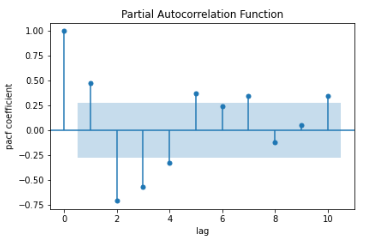|Rule 1
|
|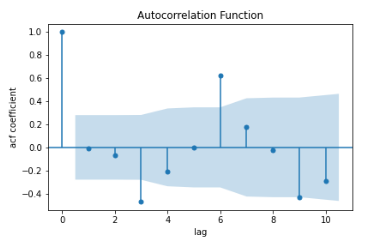|Rule 2
|

- **Rule 1**: We can select the order $p$ for $AR(p)$ model based on significant spikes from the **PACF** plot. One more indicator of the $AR$ process is that the **ACF** plot decay more slowly.

- **Rule 2**: In contrast to the $AR$ model, we can select the order $q$ for the model $MA(q)$ from **ACF** if this plot has a sharp cut-off after lag $q$.


## Model selection: Information Criteria


- ACF and PACF are somehow subjetive
-Information criteria measure the relative quality of model in a given dataset. They are used in time series models but also with cross section data. The best model is the one with the **lowest IC** (Information Criteria).
- For ARIMA models:
 - 1. Akaike's information criterion (AIC)

  $$
  AIC = -2ln(L) + 2(p + q + k + 1)
  $$

 - 2. Corrected AIC 
  $$
  cAIC = AIC + \frac{2(p+q+k+1)(p+q+k+2)}{T-p-q-k-2}
  $$

  - 3. Bayesian information criterion (BIC)
  $$
  BIC = AIC +[ln(T)-2](p+q+k+1)
  $$

- **Note**: $L$ is the likelihood of the data and $k=1$ if the model includes a mean or drift.


## Forecast Accuracy

- Remember that a model that fits well the data will not necessaried forecast well.
- When choosing competing models, it is common practice to separate the available data in two groups:
 - "**In sample data (or training data)**", used to estimate all the parameters of the model.
 - "**Outoff sample data (or test data)**", used to evaluate the model accuracy.
- Typically the test data is 20% of the total sample, or at least larger as the forecast horizon ($H$)
- The forecast errors are $e_{t+j} = y_{t+j} - \hat{y_{t+j}}$ for $j=1, ..., H$, where the training data is given by $(y_{1}, ..., y_{t})$ and the test data is given by $(y_{t+1}, ..., y_{t+H})$. Note that those are not the models residual.
- When comparing models with the dependant variable in the same units, two popular measure are **Mean of Absolute Errors** and **Root of Mean Square Errors**:

$$
MAE=\frac{1}{H}\sum_{j=1}^{H} |e_{t+j}|
$$

$$
RMSE=\sqrt{\frac{1}{H}\sum_{j=1}^{H} (e_{t+j})}
$$
- When dependent variables have different scale, the mean of absolute scale errors (MASE) is used instead.

# Practical Exercise (Python)

## Importing data

In [ ]:
!pip install pandas==0.25
!pip install statsmodels
!pip install pmdarima
import pandas as pd
!pip install yfinance
!pip install yahoofinancials
import yfinance as yf
from yahoofinancials import YahooFinancials

     |████████████████████████████████| 63 kB 1.3 MB/s 
     |████████████████████████████████| 6.4 MB 11.5 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas~=1.1.0; python_version >= "3.0", but you have pandas 0.25.0 which is incompatible.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
  Created wheel for yahoofinancials: filename=yahoofinancials-1.6-py3-none-any.whl size=15192 sh

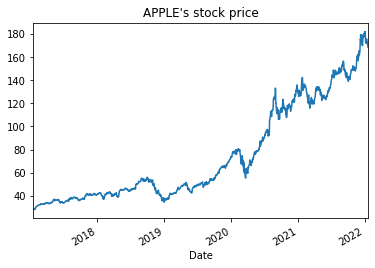

In [ ]:
ticker = yf.Ticker('AAPL')
aapl_df = ticker.history(period="5y")
aapl_df['Close'].plot(title="APPLE's stock price")

In [ ]:
# we will work with month datatime
df = aapl_df['Close'].to_frame()
df['date'] = df.index
df['Month-Year'] = df['date'].apply(lambda x:pd.Timestamp(x).strftime('%Y-%m'))
df = df.groupby(by=['Month-Year']).sum().reset_index()
df['Month-Year'] = pd.to_datetime(df['Month-Year'], infer_datetime_format=True)
df = df.set_index(['Month-Year'])
df.head()

,Close
Month-Year,
2017-01-01,256.165136
2017-02-01,599.644100
2017-03-01,764.375481
2017-04-01,641.629574
2017-05-01,793.606834


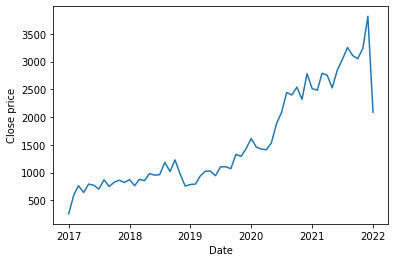

In [ ]:
# plot graph
import matplotlib.pyplot as plt

plt.xlabel('Date')
plt.ylabel('Close price')
plt.plot(df['Close'])

## Analysis (Trend and Seasonality)

In [ ]:
rolmean = df.rolling(window=12).mean()
rolstd = df.rolling(window=12).std()

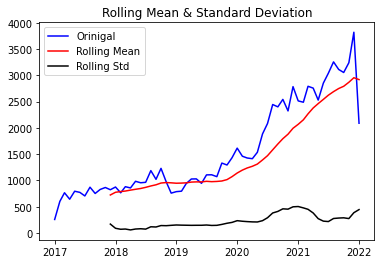

In [ ]:
# plot rolling statistics
orig = plt.plot(df, color='blue', label='Orinigal')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [ ]:
# perform adf test
from statsmodels.tsa.stattools import adfuller

print('ADF Test')
dftest = adfuller(df['Close'], autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of observations Used'])
for key, value in dftest[4].items():
  dfoutput[f'Critical value {key}'] = value

print(dfoutput)

ADF Test
Test Statistic                 -0.589109
p-value                         0.873424
#Lags Used                      1.000000
Number of observations Used    59.000000
Critical value 1%              -3.546395
Critical value 5%              -2.911939
Critical value 10%             -2.593652
dtype: float64


"The null hypothesis of the Augmented Dickey-Fuller is that there is a unit root, with the alternative that there is no unit root. If the pvalue is above a critical size, then we cannot reject that there is a unit root.

The p-values are obtained through regression surface approximation from MacKinnon 1994, but using the updated 2010 tables. If the p-value is close to significant, then the critical values should be used to judge whether to reject the null."
 (https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.adfuller.html)

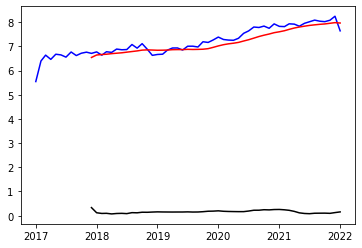

In [ ]:
# Estimating trend
import numpy as np
df_log = np.log(df)
rolmean_log = df_log.rolling(window=12).mean()
rolstd_log = df_log.rolling(window=12).std()
plt.plot(df_log, color='blue')
plt.plot(rolmean_log, color='red')
plt.plot(rolstd_log, color='black')

## Make my data Stationary



### Differentation


In [ ]:
diff_df_log = df_log - rolmean_log
diff_df_log.dropna(inplace=True) # Remove Nan Values
diff_df_log.head()

,Close
Month-Year,
2017-12-01,0.169275
2018-01-01,0.128043
2018-02-01,-0.026631
2018-03-01,0.103056
2018-04-01,0.051930


In [ ]:
print('Results ADF Test:')
dftest = adfuller(diff_df_log['Close'], autolag='AIC')
dfoutput = pd.Series(dftest[:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
  dfoutput[f'Critical values {key}'] = value
print(dfoutput)

Results ADF Test:
Test Statistic                 -2.654115
p-value                         0.082320
#Lags Used                      0.000000
Number of Observations Used    49.000000
Critical values 1%             -3.571472
Critical values 5%             -2.922629
Critical values 10%            -2.599336
dtype: float64


**Note:** We need that **p-value < 0.05** to reject the null hypothesis with 5% significance level. (**The Null Hipothesis said that the time series is non-stationaty, so we need to rejected**)

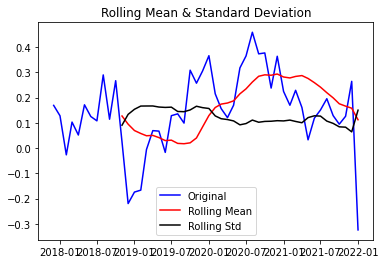

In [ ]:
# Visualize
movingAverage = diff_df_log.rolling(window=12).mean()
movingSTD = diff_df_log.rolling(window=12).std()

orig = plt.plot(diff_df_log, color='blue', label='Original')
mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
std = plt.plot(movingSTD, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

### Exponential Decay Weighted Average

Results ADF Test:
Test Statistic                 -1.921750
p-value                         0.321899
#Lags Used                      1.000000
Number of Observations Used    59.000000
Critical values 1%             -3.546395
Critical values 5%             -2.911939
Critical values 10%            -2.593652
dtype: float64


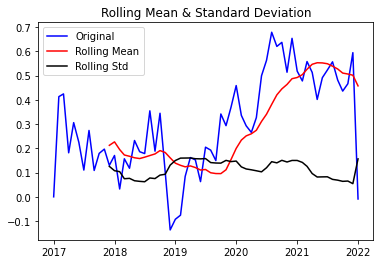

In [ ]:
df_log_ewm = df_log.ewm(halflife=12, min_periods=0, adjust=True).mean()
diff_df_log_ewm = df_log - df_log_ewm # apply diff

print('Results ADF Test:')
dftest = adfuller(diff_df_log_ewm['Close'], autolag='AIC')
dfoutput = pd.Series(dftest[:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
  dfoutput[f'Critical values {key}'] = value
print(dfoutput)

# Visualize
movingAverage = diff_df_log_ewm.rolling(window=12).mean()
movingSTD = diff_df_log_ewm.rolling(window=12).std()

orig = plt.plot(diff_df_log_ewm, color='blue', label='Original')
mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
std = plt.plot(movingSTD, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

### Shifting


Results ADF Test:
Test Statistic                -9.441479e+00
p-value                        4.881476e-16
#Lags Used                     0.000000e+00
Number of Observations Used    5.900000e+01
Critical values 1%            -3.546395e+00
Critical values 5%            -2.911939e+00
Critical values 10%           -2.593652e+00
dtype: float64


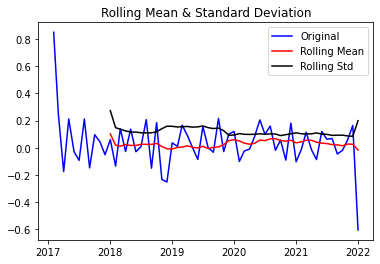

In [ ]:
diff_df_log_shift = df_log - df_log.shift()
diff_df_log_shift.dropna(inplace=True)

print('Results ADF Test:')
dftest = adfuller(diff_df_log_shift['Close'], autolag='AIC')
dfoutput = pd.Series(dftest[:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
  dfoutput[f'Critical values {key}'] = value
print(dfoutput)

# Visualize
movingAverage = diff_df_log_shift.rolling(window=12).mean()
movingSTD = diff_df_log_shift.rolling(window=12).std()

orig = plt.plot(diff_df_log_shift, color='blue', label='Original')
mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
std = plt.plot(movingSTD, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

## ACF and PACF

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# note: We use data from diff shifting


### ACF

Text(0.5, 1.0, 'Autocorrelation function')

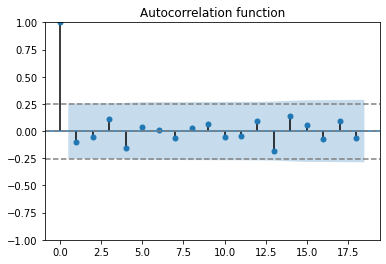

In [ ]:
plot_acf(diff_df_log_shift['Close'].values, fft=1)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(diff_df_log_shift)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(diff_df_log_shift)), linestyle='--', color='gray')
plt.title('Autocorrelation function')

**Note:** Here the ACF show us that the first lag comes fast to negative values, so that tell the time series could be over-stationary.

### PACF

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


Text(0.5, 1.0, 'Partial Autocorrelation function')

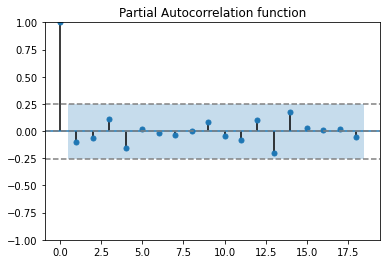

In [ ]:
plot_pacf(diff_df_log_shift['Close'].values)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(diff_df_log_shift)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(diff_df_log_shift)), linestyle='--', color='gray')
plt.title('Partial Autocorrelation function')

## Check d parameter

In [ ]:
from pmdarima.arima.utils import ndiffs
y = df_log.values

## Adf Test
print('adf test: ', ndiffs(y, test='adf'))

# KPSS test
print('kpss test: ', ndiffs(y, test='kpss'))

# PP test:
print('pp test: ', ndiffs(y, test='pp'))

adf test:  1
kpss test:  1
pp test:  0


**Note**: The time serie not will be perfectly stationary, but at least weakly stationary.

Text(0.5, 1.0, 'Autocorrelation function')

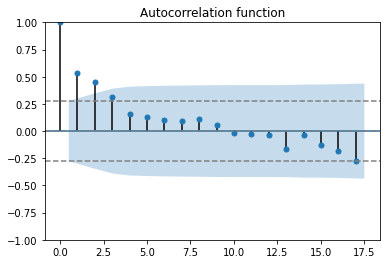

In [ ]:
# ACF
plot_acf(diff_df_log['Close'].values, fft=1)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(diff_df_log)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(diff_df_log)), linestyle='--', color='gray')
plt.title('Autocorrelation function')

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


Text(0.5, 1.0, 'Partial Autocorrelation function')

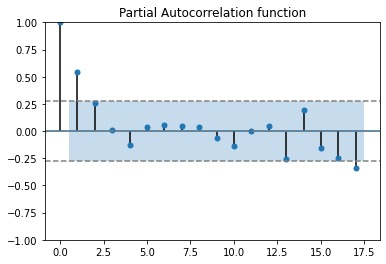

In [ ]:
# PACF
plot_pacf(diff_df_log['Close'].values)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(diff_df_log)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(diff_df_log)), linestyle='--', color='gray')
plt.title('Partial Autocorrelation function')

**Note**: With both plots, we can see this rule:

- Rule 1: We can select the order  p  for  AR(p)  model based on significant spikes from the PACF plot. One more indicator of the  AR  process is that the ACF plot decay more slowly.

## ARIMA

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# ARIMA model
model = ARIMA(df_log['Close'].values, order=(0, 1, 1))
results_ARIMA = model.fit()
print(results_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   61
Model:                 ARIMA(0, 1, 1)   Log Likelihood                  17.753
Date:                Wed, 19 Jan 2022   AIC                            -31.506
Time:                        20:30:01   BIC                            -27.317
Sample:                             0   HQIC                           -29.867
                                 - 61                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.1449      0.098     -1.485      0.138      -0.336       0.046
sigma2         0.0324      0.003     11.551      0.000       0.027       0.038
Ljung-Box (L1) (Q):                   0.00   Jarque-

<Figure size 432x288 with 0 Axes>

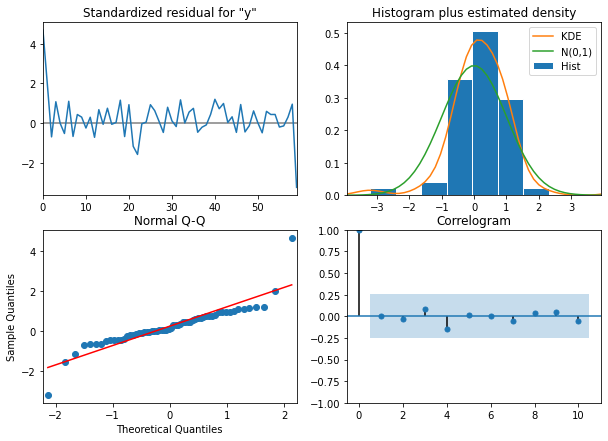

In [ ]:
fig = plt.figure()
fig = results_ARIMA.plot_diagnostics(figsize=(10, 7))
# We hope to see that residual errors trend to 0, and not have significance correlations

Plotting ARIMA mdoel


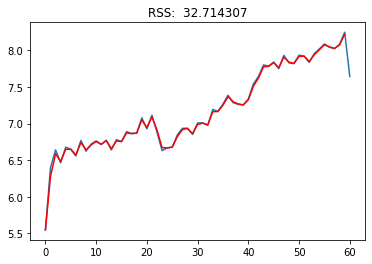

In [ ]:
# plot graph
plt.plot(df_log['Close'].values)
plt.plot(results_ARIMA.fittedvalues[1:], color='red')
plt.title('RSS: % 4f' % sum((results_ARIMA.fittedvalues - df_log['Close'].values)**2))
print('Plotting ARIMA mdoel')

## Forecasting

In [ ]:
# Create Training and Test (80% and 20%)
n = int(np.round(len(df_log)*0.8, 0))
train = df_log['Close'][:n]
test = df_log['Close'][n:]
print(len(train))
print(len(test))

49
12


In [ ]:
# Create and fit the ARIMA model 
model = ARIMA(train, order=(1, 1, 3))
fitted = model.fit() 

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [ ]:
# Make as pandas series
forecast = fitted.get_forecast(len(test))
fc = fitted.predict(start=pd.Timestamp(test.index[0]).strftime('%Y-%m-%d')
, end=pd.Timestamp(test.index[-1]).strftime('%Y-%m-%d'))
conf = forecast.conf_int()

fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf['lower Close'], index=test.index)
upper_series = pd.Series(conf['upper Close'], index=test.index)


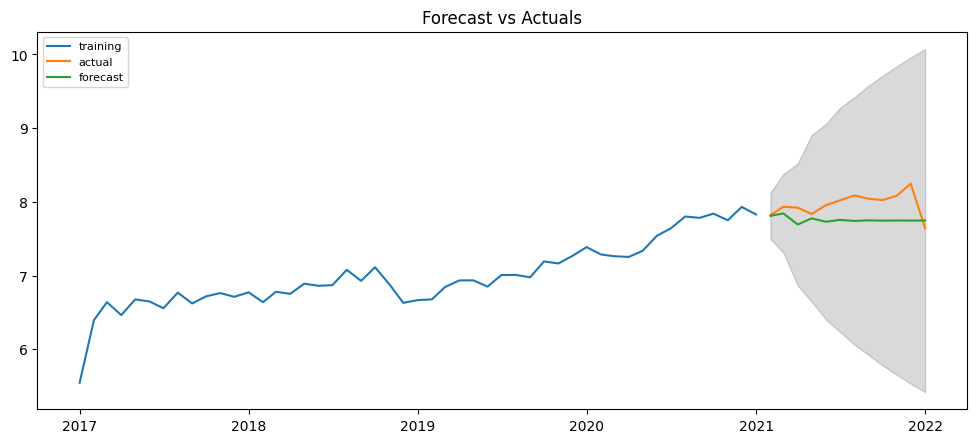

In [ ]:
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

### Search and adjust p, d, q to ARIMA (Train data)

Text(0.5, 1.0, 'Autocorrelation function')

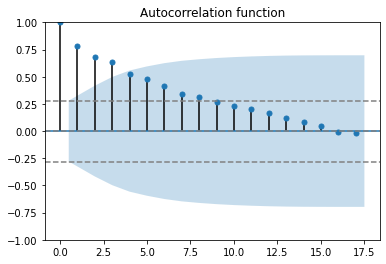

In [ ]:
# ACF
plot_acf(train, fft=1)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(train)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(train)), linestyle='--', color='gray')
plt.title('Autocorrelation function')

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


Text(0.5, 1.0, 'Partial Autocorrelation function')

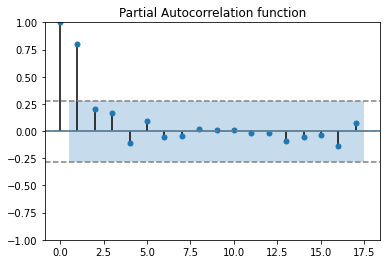

In [ ]:
# PACF
plot_pacf(train)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(train)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(train)), linestyle='--', color='gray')
plt.title('Partial Autocorrelation function')

In [ ]:
y = train

## Adf Test
print('adf test: ', ndiffs(y, test='adf'))

adf test:  1


**Note**: Maybe p=1, d=1 and q=3

In [ ]:
# Create and fit the ARIMA model 
model = ARIMA(train, order=(1, 1, 3))
fitted = model.fit()
print(fitted.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                   49
Model:                 ARIMA(1, 1, 3)   Log Likelihood                  18.243
Date:                Wed, 19 Jan 2022   AIC                            -26.486
Time:                        21:49:26   BIC                            -17.130
Sample:                    01-01-2017   HQIC                           -22.951
                         - 01-01-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5537      0.266     -2.082      0.037      -1.075      -0.033
ma.L1          0.9237      0.246      3.747      0.000       0.441       1.407
ma.L2          0.8472      0.174      4.880      0.0

### Accuracy Metrics

In [ ]:
# Because we are using the same y-test to compare, we can use MAE and RMSE
def MAE(y_true, y_pred):
  return np.mean(np.abs(y_true - y_pred))

def RMSE(y_true, y_pred):
  return np.sqrt(np.mean((y_true - y_pred)**2))

In [ ]:
y1 = RMSE(fc, test)
y2 = MAE(fc, test)

print('RMSE: ', y1)
print('MAE: ', y2)

RMSE:  0.2649233898855546
MAE:  0.22776983718629853


## AUTO-ARIMA

In [ ]:
import pmdarima as pm

In [ ]:
train_1 = pd.DataFrame(train)

In [ ]:
# Auto-ARIMA
model = pm.auto_arima(train_1, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=4, max_q=4, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.30 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-29.045, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-27.573, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-27.643, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-27.488, Time=0.04 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.515 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   49
Model:               SARIMAX(0, 1, 0)   Log Likelihood                  16.522
Date:                Wed, 19 Jan 2022   AIC                            -29.045
Time:                        22:36:58   BIC                            -25.303
Sample:                             0   HQIC                           -27.631
                                 - 49                                         
Covari

In [ ]:
# Make as pandas series
fc, conf = model.predict(n_periods=len(test), return_conf_int=True)

fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)


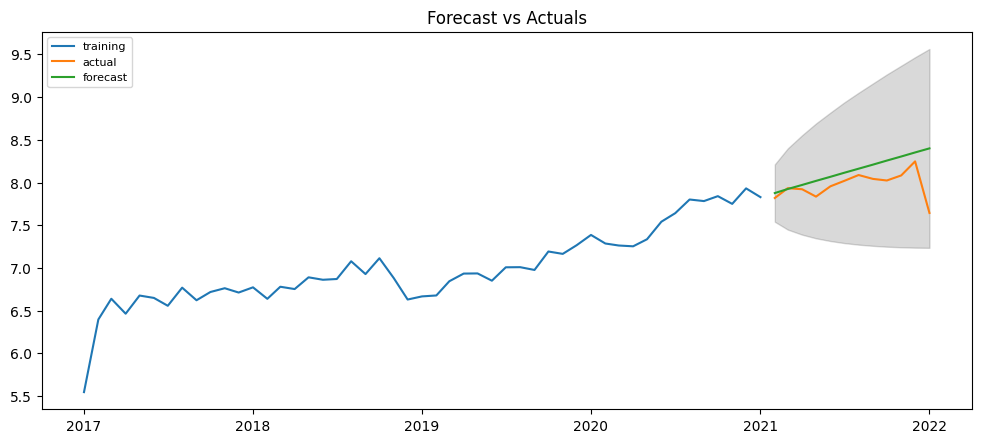

In [ ]:
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [ ]:
y1 = RMSE(fc, test)
y2 = MAE(fc, test)

print('RMSE: ', y1)
print('MAE: ', y2)

RMSE:  0.2551164133646156
MAE:  0.172125557332947
